<a href="https://colab.research.google.com/github/amballa-mahesh/Deep_learning_google_stocks_prediction/blob/main/google_stocks_prediction_GRU_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gsheet_url="https://docs.google.com/spreadsheets/d/1Sqf4OdzWkm_BkfnSw2YAMF_J7vEApKu3uJosyqNgPrE/edit#gid=0"

In [ ]:
url_1 = gsheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
import pandas as pd

Reading Data

In [ ]:
df = pd.read_csv(url_1,index_col='Date',parse_dates= ['Date'])

In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-10 16:00:00,107.39,107.97,105.60,106.95,19741517
2023-04-11 16:00:00,106.92,107.22,105.28,106.12,18721278
2023-04-12 16:00:00,107.39,107.59,104.97,105.22,22761569
2023-04-13 16:00:00,106.47,108.27,106.44,108.19,21650747
2023-04-14 16:00:00,107.69,109.58,107.59,109.46,20758686


In [ ]:
df.shape

(1376, 5)

Taking High values for predition


In [ ]:
data = df['High'].values
data = data.reshape(-1,1)

Transforming using minmax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
data = scaler.fit_transform(data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

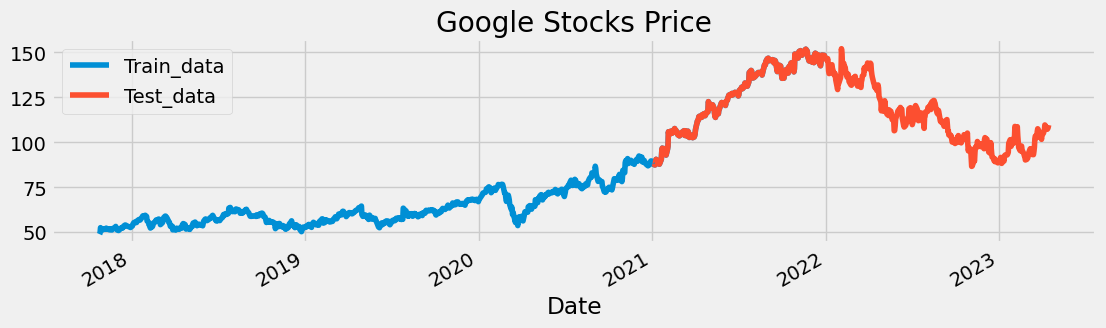

In [ ]:
df['High'][:'2021'].plot(figsize = (12,3),legend=True)
df['High']['2021':].plot(figsize = (12,3),legend=True)
plt.legend(['Train_data','Test_data'])
plt.title('Google Stocks Price')
plt.show()


In [ ]:
train_data = data[:1316]
test_data  = data[1316:]

In [ ]:
test_data.shape

(60, 1)

Creating x_train as 60days of data in series used to predict the 61st day(Just we took 60days as buffer)

In [ ]:
x_train = []
y_train = []

for i in range(60,train_data.shape[0]):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train[0][-1]

array([0.08896418])

In [ ]:
y_train[0]

array([0.0946757])

In [ ]:
x_train.shape,y_train.shape

((1256, 60, 1), (1256, 1))

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,SimpleRNN,GRU

Model creation using RNN and GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(60, input_shape = (x_train.shape[1],1),activation='tanh',return_sequences=True))
model.add(Dropout(rate = 0.2))
model.add(GRU(60,activation='tanh'))
model.add(Dropout(rate = 0.2))
model.add(Dense(units =1))

In [ ]:
model.compile(optimizer= 'adam',loss = 'mean_squared_error',metrics = 'accuracy')

In [ ]:
model.fit(x_train,y_train,epochs = 100,batch_size=100,validation_split= 0.2)

Epoch 1/100
11/11 [==============================] - 4s 144ms/step - loss: 0.0654 - accuracy: 0.0000e+00 - val_loss: 0.0202 - val_accuracy: 0.0040
Epoch 2/100
11/11 [==============================] - 1s 82ms/step - loss: 0.0124 - accuracy: 0.0000e+00 - val_loss: 0.0090 - val_accuracy: 0.0040
Epoch 3/100
11/11 [==============================] - 1s 53ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accuracy: 0.0040
Epoch 4/100
11/11 [==============================] - 1s 55ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0040
Epoch 5/100
11/11 [==============================] - 1s 54ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0040
Epoch 6/100
11/11 [==============================] - 1s 56ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0040
Epoch 7/100
11/11 [==============================] - 1s 57ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0026 

In [ ]:
test_data = data[:120]

In [ ]:
x_test = []
y_test = []

for i in range(60,test_data.shape[0]):
  x_test.append(test_data[i-60:i])
  y_test.append(test_data[i])

x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_test[0][-1],y_test[0]

(array([0.08896418]), array([0.0946757]))

In [ ]:
x_test.shape,y_test.shape

((60, 60, 1), (60, 1))

In [ ]:
y_test_inv = scaler.inverse_transform(y_test)

In [ ]:
y_pred = model.predict(x_test)

2/2 [==============================] - 1s 14ms/step


Inversing the data from Minmax scaler

In [ ]:
y_pred_inv = scaler.inverse_transform(y_pred)

Testing the model

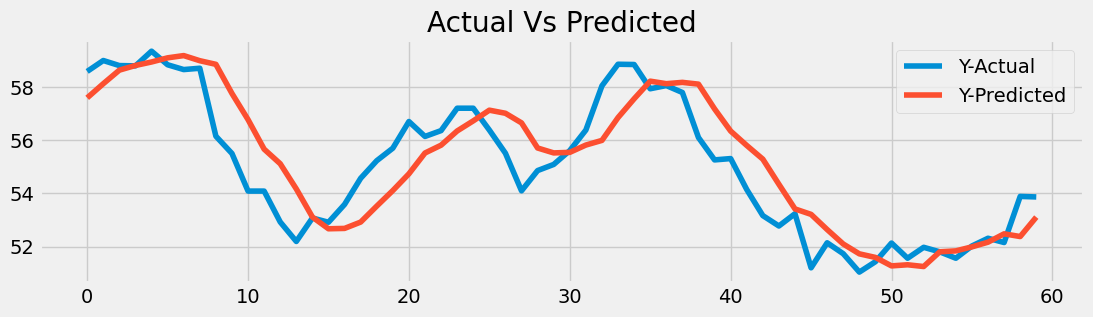

In [ ]:
plt.figure(figsize=(12,3))
plt.plot(y_test_inv, label = 'Y-Actual')
plt.plot(y_pred_inv, label = 'Y-Predicted')
plt.title('Actual Vs Predicted')
plt.legend()
plt.show()